<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/tabular_heatmap_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "torch==1.4" "torchvision==0.5.0" #use the old version

     |████████████████████████████████| 753.4MB 20kB/s 
     |████████████████████████████████| 4.0MB 56.6MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


In [2]:
!pip install ipdb
from ipdb import set_trace as st

  Created wheel for ipdb: filename=ipdb-0.13.4-cp36-none-any.whl size=10973 sha256=178c484fb660ee201238072d27d5f33c10ee37368b57f294327cdb60284ce432
  Stored in directory: /root/.cache/pip/wheels/56/51/e4/c91c61e3481a1a967beb18c4ea7a2b138a63cce94170b2e206
Successfully built ipdb


In [3]:
from fastai import *
from fastai.tabular import *

In [4]:
#test
#trying dropout...
a = torch.randn(4, 4)
b = torch.tensor([1., 0, 1., 0])
print(a.shape, b.shape)
print(b.unsqueeze(1).shape, a)
y = a * b.unsqueeze(1)
print(y)

torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 1]) tensor([[-0.1476, -1.2513,  0.8802, -0.1372],
        [-1.5734, -0.2134,  0.0608,  1.0049],
        [-0.5062, -0.8611,  1.5684,  0.3126],
        [-0.7784, -1.0778,  1.0436, -1.1108]])
tensor([[-0.1476, -1.2513,  0.8802, -0.1372],
        [-0.0000, -0.0000,  0.0000,  0.0000],
        [-0.5062, -0.8611,  1.5684,  0.3126],
        [-0.0000, -0.0000,  0.0000, -0.0000]])


In [5]:
def get_layer_ps(length, p):
  layer_ps = torch.tensor([p for i in range(length)])
  layer_ps.requires_grad = False
  d = torch.bernoulli(layer_ps)
  print(layer_ps, d)
  return d

In [6]:
def perform_drop(acts, p):
  drop_len = acts.shape[1]
  drop_layer = get_layer_ps(drop_len, p)
  return acts * drop_layer.unsqueeze(1)

In [7]:
a = torch.randn(5, 5)
print(a)
y = perform_drop(a, 0.8)

tensor([[-0.7323, -0.4980, -0.9751, -0.6502,  0.9091],
        [ 0.1586, -1.1790,  0.4865,  0.5384,  1.2730],
        [ 0.5777,  0.9792, -1.9405, -2.2538, -1.2224],
        [-0.1029, -0.7924, -0.0082,  0.0061, -1.7002],
        [ 0.8765, -1.1967,  0.6706, -1.5650,  0.1568]])
tensor([0.8000, 0.8000, 0.8000, 0.8000, 0.8000]) tensor([1., 1., 1., 1., 0.])


In [8]:
bn = nn.BatchNorm1d(5)
bn

BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [9]:
for i in bn.parameters():
  print(i.shape, i)

torch.Size([5]) Parameter containing:
tensor([1., 1., 1., 1., 1.], requires_grad=True)
torch.Size([5]) Parameter containing:
tensor([0., 0., 0., 0., 0.], requires_grad=True)


In [10]:
bn.__dict__

{'_backward_hooks': OrderedDict(),
 '_buffers': OrderedDict([('running_mean', tensor([0., 0., 0., 0., 0.])),
              ('running_var', tensor([1., 1., 1., 1., 1.])),
              ('num_batches_tracked', tensor(0))]),
 '_forward_hooks': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_modules': OrderedDict(),
 '_parameters': OrderedDict([('weight', Parameter containing:
               tensor([1., 1., 1., 1., 1.], requires_grad=True)),
              ('bias', Parameter containing:
               tensor([0., 0., 0., 0., 0.], requires_grad=True))]),
 '_state_dict_hooks': OrderedDict(),
 'affine': True,
 'eps': 1e-05,
 'momentum': 0.1,
 'num_features': 5,
 'track_running_stats': True,
 'training': True}

In [11]:
test = torch.randn(64, 10)
test[:, 2]

tensor([-0.6788, -1.1652,  0.7981, -0.5922,  0.2495, -0.2262, -0.4144,  0.1930,
        -1.0416, -1.5234, -3.0941, -0.4653, -0.0991,  0.3018,  0.7271, -0.3965,
        -0.1390,  0.3419,  1.2587, -0.6707, -0.0744,  1.7715, -1.3261, -0.1876,
         1.1591, -0.0471, -0.0153, -1.0605,  0.7139,  0.7589, -0.3047, -0.1928,
        -1.1094, -0.8482,  0.0432,  0.5906, -1.0230, -1.5903,  0.4452,  0.0794,
         1.6126,  0.5947, -0.4798,  0.0397, -0.7447, -1.0260,  0.2322, -0.1578,
        -0.2816,  1.3005, -0.0599,  1.5711,  0.0876,  2.2833,  0.9041, -0.9345,
        -1.9704,  0.8701, -0.6572, -0.1335, -0.1756, -0.0515,  0.0986,  0.4430])

In [12]:
path = untar_data(URLs.ADULT_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/adult_sample/models'),
 PosixPath('/root/.fastai/data/adult_sample/adult.csv'),
 PosixPath('/root/.fastai/data/adult_sample/export.pkl')]

In [13]:
df = pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [14]:
nan = df.iloc[0]['occupation']

In [15]:
fill_missing = FillMissing(cat_names=['occupation'], cont_names = ['education-num'])

In [16]:
fill_missing(df)

In [17]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,education-num_na
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k,False
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k,False
2,38,Private,96185,HS-grad,10.0,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k,True
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k,False
4,42,Self-emp-not-inc,82297,7th-8th,10.0,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k,True


In [18]:
def get_min_steps(a, b):
  if a == b:
    return 0

  def get_diff(a, b):
    int_div = int(a/b)
    return (int_div + 1)*b - a

  diff = b - a if a < b else get_diff(a, b)
  steps = 0
  while diff > 0:
    print(diff, steps)
    if diff >= 5:
      steps += 1
      diff -= 5
    elif diff >= 2:
      steps += 1
      diff -= 2
    elif diff >= 1:
      steps += 1
      diff -= 1
    
  return steps

In [19]:
categ = Categorify(cat_names=['occupation'], cont_names= [])
categ(df)

In [20]:
norm = Normalize(cat_names = ['occupation'], cont_names= ['education-num'])
norm(df)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,education-num_na
0,49,Private,101320,Assoc-acdm,0.752389,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k,False
1,44,Private,236746,Masters,1.535566,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k,False
2,38,Private,96185,HS-grad,-0.030787,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k,True
3,38,Self-emp-inc,112847,Prof-school,1.927154,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k,False
4,42,Self-emp-not-inc,82297,7th-8th,-0.030787,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k,True


In [21]:
df = pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [22]:
cat_vars = ['age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
cont_vars = ['fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
dep_var = 'salary'

In [23]:
procs = [FillMissing, Categorify, Normalize]

In [24]:
src = TabularList.from_df(df, cat_names = cat_vars, cont_names= cont_vars, procs = procs).split_by_rand_pct().label_from_df(cols = dep_var)
src

LabelLists;

Train: LabelList (26049 items)
x: TabularList
age 44; workclass  Private; education  Masters; marital-status  Divorced; occupation  Exec-managerial; relationship  Not-in-family; race  White; sex  Male; native-country  United-States; education-num_na False; fnlwgt 0.4476; education-num 1.5361; capital-gain 1.2596; capital-loss -0.2175; hours-per-week 0.3645; ,age 38; workclass  Private; education  HS-grad; marital-status  Divorced; occupation #na#; relationship  Unmarried; race  Black; sex  Female; native-country  United-States; education-num_na True; fnlwgt -0.8879; education-num -0.0294; capital-gain -0.1444; capital-loss -0.2175; hours-per-week -0.6830; ,age 42; workclass  Self-emp-not-inc; education  7th-8th; marital-status  Married-civ-spouse; occupation  Other-service; relationship  Wife; race  Black; sex  Female; native-country  United-States; education-num_na True; fnlwgt -1.0199; education-num -0.0294; capital-gain -0.1444; capital-loss -0.2175; hours-per-week 0.76

In [25]:
bs = 64
data = src.databunch(bs = bs)

In [26]:
data.show_batch()

age,workclass,education,marital-status,occupation,relationship,race,sex,native-country,education-num_na,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target
18,?,HS-grad,Widowed,?,Own-child,White,Male,United-States,False,0.0603,-0.4208,-0.1444,-0.2175,-0.0384,<50k
23,Private,Bachelors,Never-married,Tech-support,Not-in-family,White,Male,United-States,False,1.5087,1.1447,-0.1444,-0.2175,-0.0384,<50k
61,?,Bachelors,Married-civ-spouse,?,Husband,White,Male,United-States,False,-0.2757,1.1447,0.4410,-0.2175,-2.0526,>=50k
21,Private,HS-grad,Never-married,Handlers-cleaners,Own-child,White,Female,United-States,False,2.3992,-0.4208,-0.1444,-0.2175,-0.0384,<50k
38,State-gov,HS-grad,Married-civ-spouse,Adm-clerical,Wife,Black,Female,United-States,False,-0.4524,-0.4208,-0.1444,-0.2175,-0.0384,<50k


In [27]:
doc(tabular_learner)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


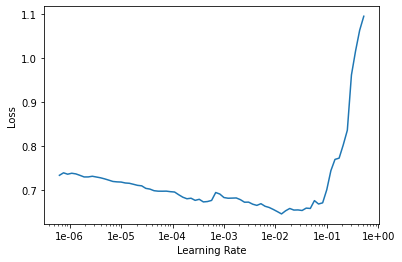

In [28]:
learn = tabular_learner(data, layers = [1000, 500], emb_drop=0.2, metrics = accuracy)
learn.lr_find()
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(3, max_lr = 5e-02, wd = 1e-03)

epoch,train_loss,valid_loss,accuracy,time
0,0.354409,0.332851,0.847205,00:04
1,0.338414,0.345024,0.847052,00:04
2,0.326252,0.323455,0.851505,00:04


In [30]:
#test
emb = nn.Embedding(100, 20)
emb.embedding_dim

20

In [31]:
model = learn.model

In [32]:
model.__dict__

{'_backward_hooks': OrderedDict(),
 '_buffers': OrderedDict(),
 '_forward_hooks': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_modules': OrderedDict([('embeds', ModuleList(
                 (0): Embedding(74, 18)
                 (1): Embedding(10, 6)
                 (2): Embedding(17, 8)
                 (3): Embedding(8, 5)
                 (4): Embedding(16, 8)
                 (5): Embedding(7, 5)
                 (6): Embedding(6, 4)
                 (7): Embedding(3, 3)
                 (8): Embedding(42, 13)
                 (9): Embedding(3, 3)
               )),
              ('emb_drop', Dropout(p=0.2, inplace=False)),
              ('bn_cont',
               BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)),
              ('layers', Sequential(
                 (0): Linear(in_features=78, out_features=1000, bias=True)
                 (1): ReLU(inplace=True)
                 (2): BatchNor

In [33]:
from fastai.vision import *

In [34]:
model = learn.model
layers = model.layers

In [35]:
layers

Sequential(
  (0): Linear(in_features=78, out_features=1000, bias=True)
  (1): ReLU(inplace=True)
  (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Linear(in_features=1000, out_features=500, bias=True)
  (4): ReLU(inplace=True)
  (5): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Linear(in_features=500, out_features=2, bias=True)
)

In [36]:
doc(get_transforms)

In [37]:
path = untar_data(URLs.PETS)
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [38]:
(path/'images').ls()[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pug_189.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_110.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_52.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/leonberger_70.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_23.jpg')]

In [39]:
img = open_image((path/'images').ls()[2])

In [40]:
tfms = get_transforms()
tfms = tfms[0]

In [41]:
img.size

torch.Size([500, 460])

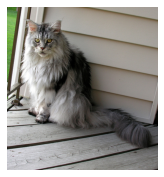

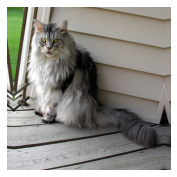

In [42]:
img = open_image((path/'images').ls()[2])
show_image(img) 
show_image(tfms[0](img, size = 500))

In [43]:
tfms[1]

RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True)

In [44]:
def get_ex():
  return open_image((path/'images').ls()[2])

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

In [45]:
rows = 2
cols = 4
width = 12
height = 6
size = 224

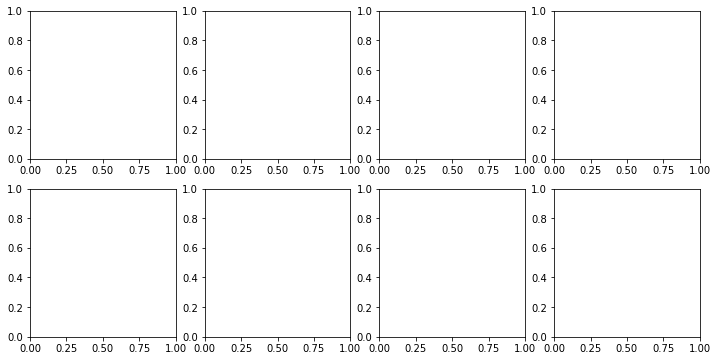

In [46]:
sub_plots = plt.subplots(rows,cols,figsize=(width,height))

In [47]:
sub_plots[1].flatten()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f87ef6fce48>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f884cf1fe48>], dtype=object)

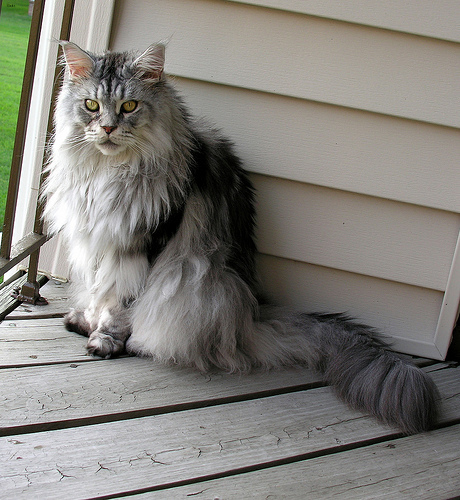

In [48]:
img = get_ex()
img

In [49]:
arch = models.resnet34()
y = arch(img.data[None])

In [50]:
y.shape

torch.Size([1, 1000])

In [51]:
layers = list(arch.children())

In [52]:
layers[9]

Linear(in_features=512, out_features=1000, bias=True)

In [53]:
enc = nn.Sequential(*layers[:8])
reduced_img = enc(img.data[None])

In [54]:
reduced_img.shape

torch.Size([1, 512, 16, 15])

In [55]:
acts = reduced_img

In [56]:
heat = acts.mean(dim = 1)
heat.shape, heat

(torch.Size([1, 16, 15]),
 tensor([[[0.9673, 1.1491, 1.1786, 1.0662, 0.8601, 0.7663, 0.6939, 0.7077,
           0.6764, 0.7586, 0.7221, 0.6762, 0.6570, 0.7289, 0.6572],
          [1.2406, 1.6563, 1.5513, 1.2255, 1.0634, 0.8441, 0.7695, 0.7520,
           0.6758, 0.7366, 0.7399, 0.7028, 0.7317, 0.7327, 0.6757],
          [1.4281, 1.6928, 1.6714, 1.4155, 1.0797, 0.9446, 0.8032, 0.7374,
           0.7573, 0.7504, 0.7073, 0.7269, 0.7201, 0.7254, 0.6585],
          [1.3390, 1.6930, 1.5914, 1.5324, 1.1952, 0.9216, 0.8015, 0.7423,
           0.6964, 0.7088, 0.7323, 0.7293, 0.7322, 0.6831, 0.6645],
          [1.3843, 1.6522, 1.7409, 1.4951, 1.0841, 0.9181, 0.8059, 0.7728,
           0.6647, 0.6925, 0.6874, 0.7356, 0.7770, 0.6675, 0.6533],
          [1.3200, 1.5718, 1.6236, 1.2447, 1.0770, 0.9157, 0.8619, 0.7501,
           0.6572, 0.7035, 0.7527, 0.7246, 0.6761, 0.7124, 0.7003],
          [1.4287, 1.8048, 1.6009, 1.3337, 1.0708, 0.8923, 0.8503, 0.7429,
           0.7577, 0.7998, 0.7724, 0.7213

In [57]:
layers[9]

Linear(in_features=512, out_features=1000, bias=True)

In [58]:
layers[7], layers[8]

(Sequential(
   (0): BasicBlock(
     (conv1): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (downsample): Sequential(
       (0): Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2), bias=False)
       (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     )
   )
   (1): BasicBlock(
     (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): Batc

In [59]:
im_data = img.data[None]

In [60]:
con = torch.Tensor([[1, 1, 1],
                    [0, 0, 0],
                    [-1, -1, -1]]).expand(1, 3, 3, 3)
con_2 = torch.Tensor([[1, 0, -1],
                      [1, 0, -1],
                      [1, 0, -1]]).expand(1, 3, 3, 3)
con.shape, con_2.shape
lay = torch.cat([con, con_2])
lay.shape

torch.Size([2, 3, 3, 3])

In [61]:
im_data.shape

torch.Size([1, 3, 500, 460])

In [62]:
yhat = F.conv2d(im_data, lay)
yhat.shape

torch.Size([1, 2, 498, 458])

(<matplotlib.axes._subplots.AxesSubplot at 0x7f884cf0e8d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f884a1a0438>)

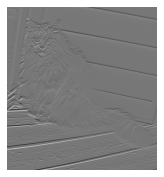

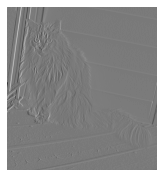

In [63]:
show_image(yhat[0][0][None]), show_image(yhat[0][1][None])

In [64]:
conv = nn.Conv2d(3, 10, 3)
yhat = conv(im_data)
yhat.shape

torch.Size([1, 10, 498, 458])

In [65]:
conv.parameters()

<generator object Module.parameters at 0x7f87ef6c1eb8>

Parameter containing:
tensor([[[[-0.0369,  0.0287,  0.1483],
          [-0.0757,  0.1574, -0.0602],
          [-0.1788,  0.1921,  0.0278]],

         [[-0.0117, -0.0980, -0.0948],
          [-0.1656,  0.0166,  0.1224],
          [-0.1137, -0.0168, -0.0010]],

         [[-0.1015, -0.0312, -0.0467],
          [-0.0048, -0.1809,  0.0249],
          [ 0.1833,  0.1877,  0.0960]]],


        [[[-0.0231,  0.1759, -0.1038],
          [-0.0108,  0.1625, -0.1545],
          [-0.1154, -0.0764,  0.0371]],

         [[ 0.0939,  0.1123,  0.1786],
          [-0.1875, -0.1014, -0.0190],
          [-0.0704,  0.0935,  0.1719]],

         [[ 0.0326, -0.1421,  0.1378],
          [-0.1584, -0.0679,  0.1288],
          [-0.0814, -0.1470,  0.0985]]],


        [[[ 0.1621,  0.0718, -0.0860],
          [-0.1783, -0.1431,  0.1366],
          [ 0.0801, -0.0779, -0.0122]],

         [[-0.0288, -0.1819, -0.1577],
          [-0.1648, -0.0100,  0.1214],
          [ 0.1712, -0.1674, -0.1807]],

         [[ 0.1691,  0

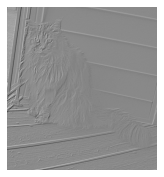

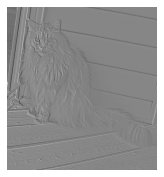

In [66]:
for i, j in zip(yhat[0], conv.parameters()):
  show_image(i[None])
  print(j)

In [71]:
heat = heat.detach()
heat.shape, im_data.shape, heat.requires_grad

(torch.Size([1, 16, 15]), torch.Size([1, 3, 500, 460]), False)

In [75]:
def get_label(path):
  return path.name.rsplit('_', 1)[0]
data = ImageList.from_folder(path/'images').split_by_rand_pct().label_from_func(get_label).transform(get_transforms(), size = 352).databunch(bs = bs)

In [ ]:
data.show_batch()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


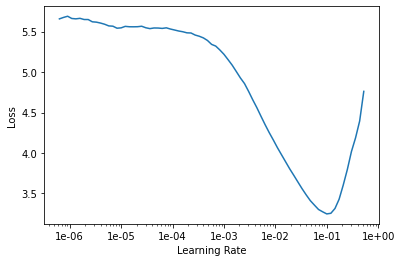

In [131]:
learn = cnn_learner(data, models.resnet34, metrics = accuracy)
learn.lr_find()
learn.recorder.plot()

In [132]:
learn.fit_one_cycle(2, 5e-03)

epoch,train_loss,valid_loss,accuracy,time
0,0.981812,0.293700,0.915426,01:15
1,0.415429,0.184106,0.943843,01:16


In [133]:
model = learn.model
model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [135]:
facts = model[0](im_data.cuda())

In [138]:
new_heat = facts.mean(1)
new_heat.shape

torch.Size([1, 16, 15])

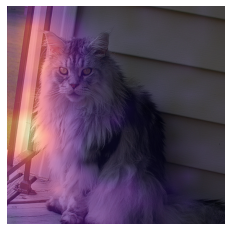

In [72]:
#before training
def show_heat_map(hm):
  _, ax = plt.subplots()
  img.show(ax)
  ax.imshow(hm, alpha = 0.6, extent = (0, 352, 352, 0), interpolation = 'bilinear', cmap = 'magma')
show_heat_map(heat[0])

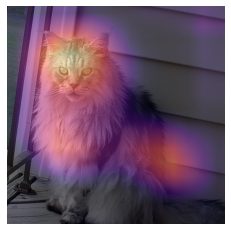

In [142]:
#after training... and thats how cnn learns 
show_heat_map(new_heat.cpu().detach()[0])

In [143]:
#now hooking shit
class HookOps():
  def __init__(self, module):
    self.op = None
    self.hook = module.register_forward_hook(self.hook_cb)
  
  def hook_cb(self, module, input, output):
    self.op = output
  
  def remove(self):
    self.hook.remove()

In [146]:
hook = HookOps(model[0])
model(im_data.cuda())

tensor([[-0.0355,  0.7101, -0.2052,  0.5837,  0.9077,  0.9183, 13.8651,  5.6039,
          2.8018,  1.5871, -4.5670,  0.0581, -2.4987, -3.5198,  0.7176, -0.0730,
         -2.0305, -4.8758,  0.7531,  0.9378, -1.9326,  0.3734,  1.3932, -0.4661,
          3.1689, -0.6562, -4.4172,  2.0786, -2.2198, -2.0507, -2.6830,  2.2975,
          2.3550, -4.2582, -2.6646, -0.4072,  1.5956]], device='cuda:0',
       grad_fn=<AddmmBackward>)

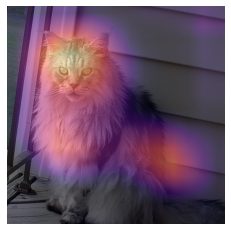

In [148]:
new_heat = hook.op.mean(1)
show_heat_map(new_heat.detach().cpu()[0])